In [9]:
# Importamos Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
plt.style.use('fivethirtyeight')


In [10]:
# Traemos un resumen con .head de los 5 primeros elementos, para observar si esta apunto nuestro dataframe
df= pd.read_csv('pokedex.csv')
df.head(n=5) 

,referencie,name,generation,status,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,Bulbasaur,1,Normal,Grass,Poison,0.7,6.9,2,Overgrow,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,Ivysaur,1,Normal,Grass,Poison,1.0,13.0,2,Overgrow,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,Venusaur,1,Normal,Grass,Poison,2.0,100.0,2,Overgrow,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Grass,Poison,2.4,155.5,1,Thick Fat,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Fire,NaN,0.6,8.5,2,Blaze,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [11]:
#Informacion del DataFrame
df.info

<bound method DataFrame.info of       referencie                            name  generation     status   
0              0                       Bulbasaur           1     Normal  \
1              1                         Ivysaur           1     Normal   
2              2                        Venusaur           1     Normal   
3              3                   Mega Venusaur           1     Normal   
4              4                      Charmander           1     Normal   
...          ...                             ...         ...        ...   
1023        1023     Zacian Hero of Many Battles           8  Legendary   
1024        1024        Zamazenta Crowned Shield           8  Legendary   
1025        1025  Zamazenta Hero of Many Battles           8  Legendary   
1026        1026                       Eternatus           8  Legendary   
1027        1027             Eternatus Eternamax           8  Legendary   

        type_1  type_2  height_m  weight_kg  abilities_number   
0 

In [12]:
#Cambiamos los titulos a Mayusculas
df.columns = df.columns.str.upper().str.replace('_', '')
df.head()

,REFERENCIE,NAME,GENERATION,STATUS,TYPE1,TYPE2,HEIGHTM,WEIGHTKG,ABILITIESNUMBER,ABILITY1,...,AGAINSTGROUND,AGAINSTFLYING,AGAINSTPSYCHIC,AGAINSTBUG,AGAINSTROCK,AGAINSTGHOST,AGAINSTDRAGON,AGAINSTDARK,AGAINSTSTEEL,AGAINSTFAIRY
0,0,Bulbasaur,1,Normal,Grass,Poison,0.7,6.9,2,Overgrow,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,Ivysaur,1,Normal,Grass,Poison,1.0,13.0,2,Overgrow,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,Venusaur,1,Normal,Grass,Poison,2.0,100.0,2,Overgrow,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Grass,Poison,2.4,155.5,1,Thick Fat,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Fire,NaN,0.6,8.5,2,Blaze,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [13]:
#Dentro de la columna nombre cambiamos el atributo Mega ya que es Innecesario
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(10)

AttributeError: Can only use .str accessor with string values!

In [ ]:
print('Las Columnnas del Dataframe Son: ',df.columns) 
print('Para este DataFrame contamos con: ',df.shape)  

In [ ]:
#Algunos valores en Type2 estan vacios debemos o Completarlos o eliminarlos, para este caso los reemplazamos
df['TYPE2'].fillna(df['TYPE1'], inplace=True)

In [ ]:
#Traemos los detalles de Cualquier Pokemon
print(df.loc['Pikachu']) 
print(df.iloc[0])
print(df.iloc[0]) 
print(df.loc['Pikachu'])

In [ ]:
#Prueba Logica para filtrar Pokemons Que cumplan las condiciones dadas
df[((df['TYPE1']=='Ghost') | (df['TYPE1']=='Dragon')) & ((df['TYPE2']=='Fairy') | (df['TYPE2']=='Fire'))]


In [ ]:
print("MAx HP:",df['HP'].idxmax()) #Devuelve el pokemon con mayor ataque
print("Max DEFENCE:",(df['DEFENSE']).idxmax())#Devuelve el pokemon con la mejor defensa

In [ ]:
#Organizamos el dataframe de mayor a menor, sumando el total de habilidades de cada uno
df.sort_values('TOTALPOINTS',ascending=False).head(5)

In [ ]:
print('Categorias por Pokemon',df['TYPE1'].unique()) 
print('En total tenemos ',df['TYPE1'].nunique())

In [ ]:
#Realizamos conteo de cuantos Pokemon tenemos por categoria
print(df['TYPE1'].value_counts(), '\n' ,df['TYPE2'].value_counts())
df.groupby(['TYPE1']).size()  
(df['TYPE1']=='Bug').sum()

In [ ]:
#Con el metodo describe podemos ver rapidamente una estadistica rapida de nuestro dataframe
df_summary = df.describe() 
df_summary

In [ ]:
#Visualizaciones
# Histograma En esta visualizacion notamos que el ataque promedio de los pokemon esta sobre los 75

bins=range(0,200,25) 
plt.hist(df["ATTACK"],bins,histtype="bar",rwidth=1,color='#0ff0ff') 
plt.xlabel('Ataque') 
plt.ylabel('Cantidad') 
plt.axvline(df['ATTACK'].mean(),linestyle='dashed',color='black') 
plt.show()

In [ ]:
#Grafico de Dispersion, muestra una comparacion de los 50 pokemon de agua vs Fuego con relacion a defensa y ataque
fire=df[(df['TYPE1']=='Fire') | ((df['TYPE2'])=="Fire")] 
water=df[(df['TYPE1']=='Water') | ((df['TYPE2'])=="Water")]  
plt.scatter(fire.ATTACK.head(50),fire.DEFENSE.head(50),color='red',label='Fuego',marker="*",s=30) 
plt.scatter(water.ATTACK.head(50),water.DEFENSE.head(50),color='blue',label="Agua",s=30)
plt.xlabel("Ataque")
plt.ylabel("Defensa")
plt.legend()
plt.plot()
fig=plt.gcf() 
fig.set_size_inches(10,6) 
plt.show()

In [ ]:
#Pokemon mas fuertes por Tipo de Pokemon

strong=df.sort_values(by='TOTALPOINTS', ascending=False) 
strong.drop_duplicates(subset=['TYPE1'],keep='first').head(10)

In [ ]:
#Ahora queremos ver la distribuicion de los pokemon
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other',
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['yellow', 'b', '#00ff00', 'c', 'r', 'g', 'silver', 'y', 'm']
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Porcentaje Tipos Diferentes de Pokemon")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [ ]:

df2=df.drop(['REFERENCIE','TOTALPOINTS','HEIGHTM','GENERATION',],axis=1)
sns.boxplot(data=df2)
plt.xticks(rotation=90, fontsize=8)
plt.tick_params(axis='x', pad=10)
plt.ylim(0,1200)  #change the scale of y axix

plt.show()


In [ ]:
plt.subplots(figsize = (10,4))
plt.title('Attack by Type1')
plt.xticks(rotation=90, fontsize=8)
sns.boxplot(x = "TYPE1", y = "ATTACK",data = df)
plt.ylim(0,200)
plt.show()

In [ ]:
plt.subplots(figsize = (10,4))
plt.title('Attack by Type2')
plt.xticks(rotation=90, fontsize=8)
sns.boxplot(x = "TYPE2", y = "ATTACK",data=df)
plt.show()

In [ ]:
plt.subplots(figsize = (10,4))
plt.title('Defence by Type')
plt.xticks(rotation=90, fontsize=8)
sns.boxplot(x = "TYPE1", y = "DEFENSE",data = df)
plt.show()

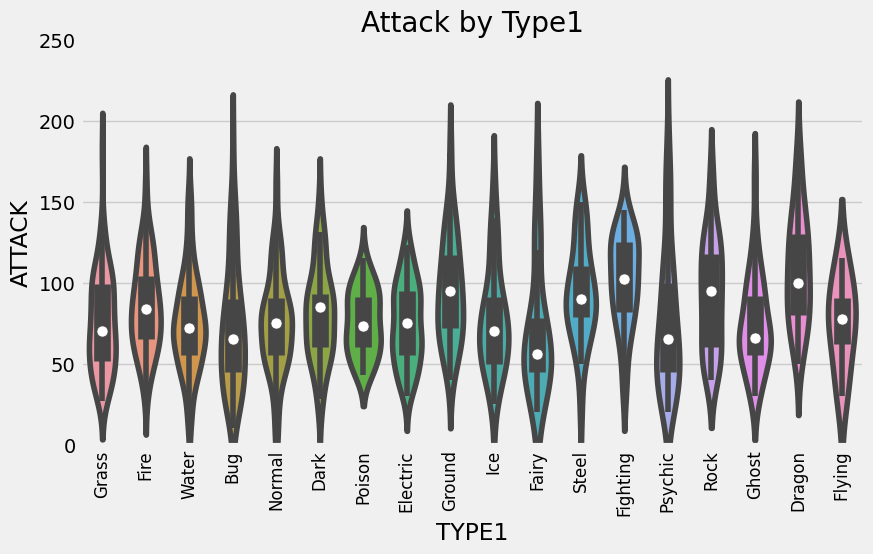

In [15]:
plt.subplots(figsize = (9,5))
plt.title('Attack by Type1')
plt.xticks(rotation=90, fontsize=12)
sns.violinplot(x = "TYPE1", y = "ATTACK",data = df)
plt.ylim(0,250)
plt.show()

In [14]:
fig = px.scatter(df, x="TYPE1", y="TOTALPOINTS", color="TYPE2",animation_frame="GENERATION", animation_group="TYPE2",hover_name = 'NAME')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.show()